In [ ]:
!pip install datasets
!pip install wget

# Import les images de stable diffusion

In [ ]:
import numpy as np
from PIL import Image
from datasets import load_dataset

image_type = 'large_first_1k'
# Load the dataset with the `large_random_1k` subset
dataset = load_dataset('poloclub/diffusiondb', image_type)

In [ ]:
fake_image = dataset['train']

In [ ]:
print(fake_image)

new_column = [1] * len(fake_image)
fake_image2 = fake_image.add_column("Label", new_column)
print(fake_image2)

Dataset({
    features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'],
    num_rows: 1000
})
Dataset({
    features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw', 'Label'],
    num_rows: 1000
})


In [ ]:
iterable_dataset = fake_image2.to_iterable_dataset()
list(iterable_dataset.take(1))

[{'image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=704x512>,
  'prompt': 'goddess portrait, ismail inceoglu ',
  'seed': 911959960,
  'step': 50,
  'cfg': 10.0,
  'sampler': 'k_lms',
  'width': 704,
  'height': 512,
  'user_name': 'd4393f4711a09b71abe9ac39a849b68d70f88ad15b94b0f0b554571bee4e6741',
  'timestamp': datetime.datetime(2022, 8, 20, 9, 32, tzinfo=<UTC>),
  'image_nsfw': 0.0559363067150116,
  'prompt_nsfw': 0.007283968850970268,
  'Label': 1}]

In [ ]:
fake_imageDB = fake_image2.remove_columns(['prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'])
print(fake_imageDB)

Dataset({
    features: ['image', 'Label'],
    num_rows: 1000
})


In [ ]:
for index, img in enumerate(fake_imageDB["image"]):
    img.save(f"/content/drive/MyDrive/image_vision/fake/fake_{index + 1}.png", format='PNG')

# Import et converti URL => PIL Image




In [ ]:
from datasets import load_dataset

# Charger le dataset à partir du lien
dataset = load_dataset("ChristophSchuhmann/improved_aesthetics_6plus", split="train")

# Prendre les 1500 premières images
images_subset = dataset[:1500]

# Vous pouvez maintenant utiliser 'images_subset' comme bon vous semble
print(len(images_subset))

10


In [ ]:
from datasets import Dataset
import requests
features = []
#se lance 1 fois
for key,_ in images_subset.items():
  features.append(key)

print(features)
images_subset = Dataset.from_dict(images_subset)
images_subset2 = images_subset.remove_columns(['TEXT', 'WIDTH', 'HEIGHT', 'similarity', 'punsafe', 'pwatermark', 'AESTHETIC_SCORE', 'hash', '__index_level_0__'])

['URL', 'TEXT', 'WIDTH', 'HEIGHT', 'similarity', 'punsafe', 'pwatermark', 'AESTHETIC_SCORE', 'hash', '__index_level_0__']


In [ ]:
print(images_subset2)
images_subset2["URL"][0]

Dataset({
    features: ['URL'],
    num_rows: 1500
})


'https://cdn.idahopotato.com/cache/4075b86c99bc2c46f927f3be5949d161_w310.jpg'

# A exécuté qu'une fois pour obtenir les images

In [ ]:
import requests
from PIL import Image
from io import BytesIO

def load_image_from_url(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            img_data = BytesIO(response.content)
            img = Image.open(img_data)
            img.load()  # Ensure image data is loaded
            return img
        else:
            print(f"Failed to download image from '{url}'. Status code: {response.status_code}")
            return None
    except (requests.RequestException, OSError) as e:
        print(f"Error in processing image from '{url}': {e}")
        return None

loaded_images = []
for url in images_subset2["URL"]:
    loaded_image = load_image_from_url(url)
    if loaded_image:
        loaded_images.append(loaded_image)


Error in processing image from 'https://www.mediaplaynews.com/wp-content/uploads/2020/11/last-christmas.png': HTTPSConnectionPool(host='www.mediaplaynews.com', port=443): Max retries exceeded with url: /wp-content/uploads/2020/11/last-christmas.png (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))
Failed to download image from 'https://cdn.shopify.com/s/files/1/0094/8653/2687/products/FAM-1202ZT_300x300.jpg?v=1570195462'. Status code: 404
Failed to download image from 'https://dreamlandtours.net/wp-content/uploads/2019/06/IMG_1768-scaled.jpg'. Status code: 403
Failed to download image from 'https://s.yimg.com/ny/api/res/1.2/oWf.pIWNf51jf0LXqcZTwA--/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9MTA1NDtoPTcwMDtpbD1wbGFuZQ--/http://media.zenfs.com/en_US/Sports/AP_General/201405211411510869115-p5.jpg'. Status code: 401
Failed to download image from 'https://i0.wp.com/theresasreviews.com/wp-content/uploads/2018/10/TheNutcracker5bd3787727

In [ ]:
len(loaded_images)

1236

In [ ]:
for index, img in enumerate(loaded_images):
    img.save(f"/content/drive/MyDrive/image_vision/real/image_{index + 1}.png", format='PNG')

# Charge le dataset PIL

In [ ]:
pil_images_real = load_dataset("imagefolder", data_dir="/content/drive/MyDrive/image_vision",split="train[:1000]")

Resolving data files:   0%|          | 0/1236 [00:00<?, ?it/s]

In [ ]:
pil_images_real

Dataset({
    features: ['image'],
    num_rows: 1000
})

In [ ]:
new_column2 = [0] * len(pil_images_real)
image_dataset = pil_images_real.add_column("Label", new_column2)

In [ ]:
image_dataset

Dataset({
    features: ['image', 'Label'],
    num_rows: 1000
})

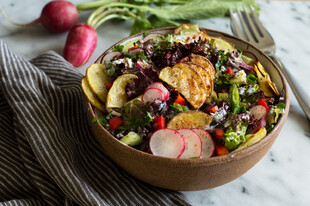

In [ ]:
image_dataset['image'][0]

# fusionne les datasets des images fakes et réelles

In [ ]:
from datasets import concatenate_datasets
all_data = concatenate_datasets([image_dataset, fake_imageDB])
all_data

Dataset({
    features: ['image', 'Label'],
    num_rows: 2000
})

In [ ]:
all_data = all_data.shuffle()

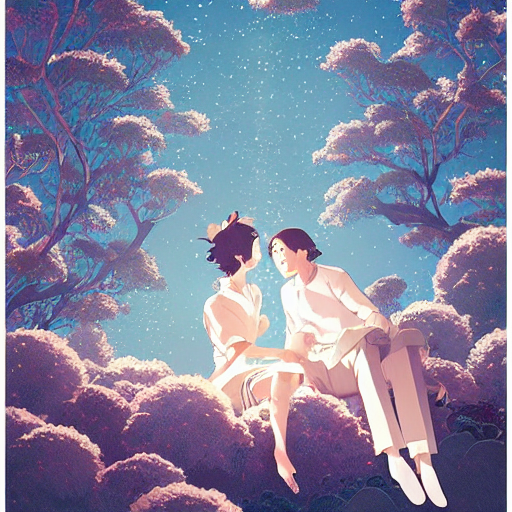

In [ ]:
all_data["image"][0]

In [ ]:
all_data["Label"][0]

0

In [ ]:
all_data_split = all_data.train_test_split(test_size=0.2)
all_data_train = all_data_split["train"]
all_data_val, all_data_test = all_data_split["test"].train_test_split(test_size=0.5).values()
print(all_data_train)
print(all_data_val)
print(all_data_test)

Dataset({
    features: ['image', 'Label'],
    num_rows: 1600
})
Dataset({
    features: ['image', 'Label'],
    num_rows: 200
})
Dataset({
    features: ['image', 'Label'],
    num_rows: 200
})


In [ ]:
 ! ls -1 /content/drive/MyDrive/image_vision/1k_real_fake/train/train | wc -l

800


In [ ]:
!  cp -r /content/drive/MyDrive/image_vision/fake/train /content/drive/MyDrive/image_vision/1k_real_fake/train/

# ne pas exécuté

In [ ]:
import os
import shutil

# Define source folders
folder1 = '/content/drive/MyDrive/image_vision/fake/train/'  # Replace with the path to your first folder
folder2 = '/content/drive/MyDrive/image_vision/real/train/'  # Replace with the path to your second folder

# Define the destination folder to merge the contents
merged_folder = '/content/drive/MyDrive/image_vision/1k_real_fake/train/'  # Replace with the path to your destination folder

os.makedirs(merged_folder, exist_ok=True)

# Function to merge contents of two folders
def merge_folders(src_folder, dest_folder):
    files = os.listdir(src_folder)
    for file in files:
        src = os.path.join(src_folder, file)
        dst = os.path.join(dest_folder, file)
        shutil.copy(src, dst)  # Change 'shutil.move' to 'shutil.copy' if you want to copy instead of move
        print(f"Moved {file} to {dest_folder}")

# Merge contents of folder1
merge_folders(folder1, merged_folder)

# Merge contents of folder2
merge_folders(folder2, merged_folder)

print("Finished merging contents from folder1 and folder2 into merged_folder.")


In [ ]:
import os
import random
import shutil

def copy_files_to_folder(file_list, dest_folder):
    os.makedirs(dest_folder, exist_ok=True)
    for file_path in file_list:
        shutil.copy(file_path, dest_folder)

def collect_files(folder_path):
    file_list = []

    # Walk through the directory structure
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_list.append(file_path)

    return file_list


fake_files = collect_files('/content/drive/MyDrive/image_vision/fake/')
real_files = collect_files('/content/drive/MyDrive/image_vision/real/')
all_files = fake_files + real_files
random.shuffle(all_files)

size = len(all_files)
train_size = int(0.8 * size)
val_size = int(0.1 * size)

train_files = all_files[:train_size]
val_files = all_files[train_size:train_size+val_size]
test_files = all_files[train_size+val_size:]

copy_files_to_folder(train_files, '/content/drive/MyDrive/image_vision/random/train')
copy_files_to_folder(val_files, '/content/drive/MyDrive/image_vision/random/val')
copy_files_to_folder(test_files, '/content/drive/MyDrive/image_vision/random/test')

In [ ]:
import os
import random
import shutil

def copy_files_to_folder(file_list, dest_folder):
    os.makedirs(dest_folder, exist_ok=True)
    for file_path in file_list:
        shutil.copy(file_path, dest_folder)

def count_files_with_pattern(folder_path, pattern):
    count = 0
    file = []
    for file_name in os.listdir(folder_path):
        if file_name.startswith(pattern) and file_name.endswith(".png"):
            file.append(folder_path+'/'+file_name)
    return file

pattern = 'image'
count = count_files_with_pattern("/content/drive/MyDrive/image_vision/random/test", pattern)
copy_files_to_folder(count, '/content/drive/MyDrive/image_vision/random/test/0')
print(count)


['/content/drive/MyDrive/image_vision/random/test/image_218.png', '/content/drive/MyDrive/image_vision/random/test/image_214.png', '/content/drive/MyDrive/image_vision/random/test/image_570.png', '/content/drive/MyDrive/image_vision/random/test/image_599.png', '/content/drive/MyDrive/image_vision/random/test/image_636.png', '/content/drive/MyDrive/image_vision/random/test/image_23.png', '/content/drive/MyDrive/image_vision/random/test/image_313.png', '/content/drive/MyDrive/image_vision/random/test/image_596.png', '/content/drive/MyDrive/image_vision/random/test/image_646.png', '/content/drive/MyDrive/image_vision/random/test/image_521.png', '/content/drive/MyDrive/image_vision/random/test/image_408.png', '/content/drive/MyDrive/image_vision/random/test/image_516.png', '/content/drive/MyDrive/image_vision/random/test/image_921.png', '/content/drive/MyDrive/image_vision/random/test/image_917.png', '/content/drive/MyDrive/image_vision/random/test/image_7.png', '/content/drive/MyDrive/ima

#coupage en patch


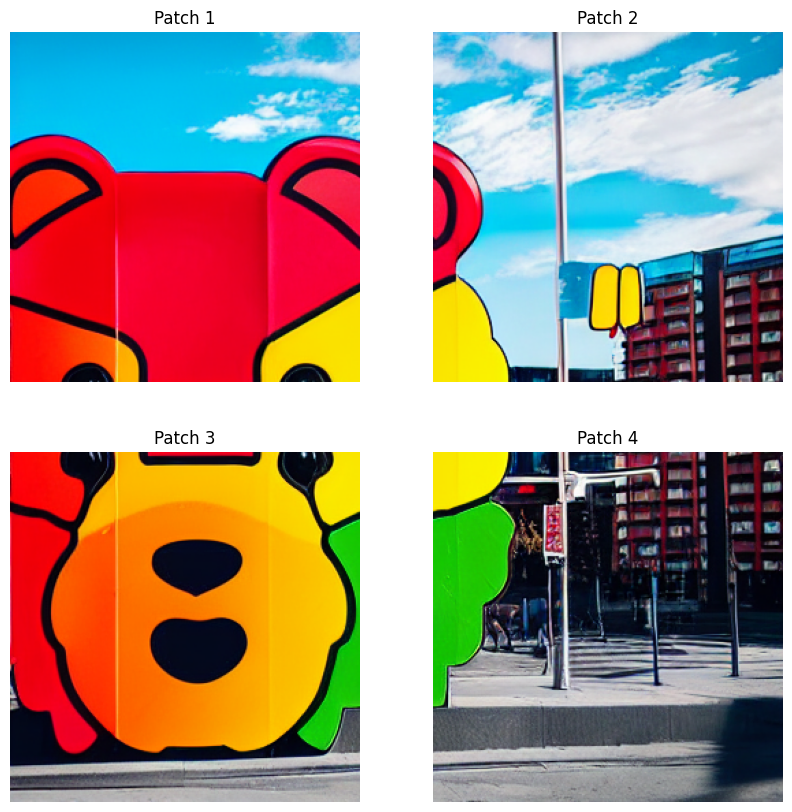

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def cut_image_into_patches(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        center_x, center_y = width // 2, height // 2

        top_left_patch = img.crop((0, 0, center_x, center_y))
        top_right_patch = img.crop((center_x, 0, width, center_y))
        bottom_left_patch = img.crop((0, center_y, center_x, height))
        bottom_right_patch = img.crop((center_x, center_y, width, height))

    return top_left_patch, top_right_patch, bottom_left_patch, bottom_right_patch

def plot_image_patches(patches):
    plt.figure(figsize=(10, 10))
    for i, patch in enumerate(patches, 1):
        plt.subplot(2, 2, i)
        plt.imshow(patch)
        plt.title(f'Patch {i}')
        plt.axis('off')

    plt.show()

image_path = '/content/drive/MyDrive/image_vision/random/train/fake_1000.png'
patches = cut_image_into_patches(image_path)
plot_image_patches(patches)


In [ ]:
import os
from PIL import Image

def cut_and_save_image_patches(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    png_files = [f for f in os.listdir(input_directory) if f.endswith('.png')]

    for png_file in png_files:
        input_image_path = os.path.join(input_directory, png_file)

        with Image.open(input_image_path) as img:

            width, height = img.size
            center_x, center_y = width // 2, height // 2
            top_left_patch = img.crop((0, 0, center_x, center_y))
            top_right_patch = img.crop((center_x, 0, width, center_y))
            bottom_left_patch = img.crop((0, center_y, center_x, height))
            bottom_right_patch = img.crop((center_x, center_y, width, height))

            top_left_patch.save(os.path.join(output_directory, f'{png_file}_top_left.png'))
            top_right_patch.save(os.path.join(output_directory, f'{png_file}_top_right.png'))
            bottom_left_patch.save(os.path.join(output_directory, f'{png_file}_bottom_left.png'))
            bottom_right_patch.save(os.path.join(output_directory, f'{png_file}_bottom_right.png'))

# Replace 'input_directory' and 'output_directory' with the actual paths
input_directory = '/content/drive/MyDrive/image_vision/random/test/1'
output_directory = '/content/drive/MyDrive/image_vision/random/test_patch/1'

cut_and_save_image_patches(input_directory, output_directory)

# ResNet50

1) Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from torch.fft import fft2

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ])
}


class FourierTransform(object):
    def __call__(self, tensor):
        dft = fft2(tensor)
        return dft.real

    def __repr__(self):
        return self.__class__.__name__ + '()'

data_transforms2 = {
    'train': transforms.Compose([
        #FourierTransform(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        FourierTransform()
    ]),
    'validation': transforms.Compose([
        #FourierTransform(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        FourierTransform()
    ])
}


In [ ]:
image_datasets = {
    'train':
    datasets.ImageFolder("/content/drive/MyDrive/image_vision/random/train", data_transforms['train']),
    'validation':
    datasets.ImageFolder('/content/drive/MyDrive/image_vision/random/val', data_transforms['validation']),
    'test':
    datasets.ImageFolder('/content/drive/MyDrive/image_vision/random/test', data_transforms['validation'])
}

dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=32,
                                shuffle=True,
                                num_workers=0),
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0),
    'test':
    torch.utils.data.DataLoader(image_datasets['test'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0)
}

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

2) chargé le modèle



In [ ]:
model = models.resnet50(weights = models.ResNet50_Weights.DEFAULT).to(device)

for param in model.parameters():
 param.requires_grad = True

model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

In [ ]:
layer1 = "layer4"
layer2 = "layer3"
#layer3 = "layer2"
for name, param in model.named_parameters():
    if layer1 in name:
      param.requires_grad = True
    if layer2 in name:
      param.requires_grad = True
    #if layer3 in name:
      #param.requires_grad = True
    print(name,param.requires_grad)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

3)  Training

In [ ]:
import copy

def train_model(model, criterion, optimizer, num_epochs):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_loss = []
    val_loss = []
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            if phase == 'validation':
              val_loss.append(epoch_loss)
            if phase == 'train':
              train_loss.append(epoch_loss)
            # Deep copy the model if it has the best validation accuracy
            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()

    # Load best model weights
    model.load_state_dict(best_model_wts)

    return model, val_loss, train_loss

In [ ]:
model_trained, val_loss, train_loss = train_model(model, criterion, optimizer, num_epochs=20)
model = model_trained

In [ ]:
epochs = range(1, len(val_loss) + 1)

# Plotting the loss values
plt.figure(figsize=(8, 6))
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

4) sauvegarde des poids du modèle

In [ ]:
torch.save(model_trained.state_dict(), '/content/drive/MyDrive/0.89weights_20epoch_lr0.001_pretrained_+FC.pt')

5) chargement des poids du modèle


In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/image_vision/models/resnet50/0.9602weights_20epoch_lr0.001_pretrained_on_3+4thLayers_+FC.pt'))

6) Métriques


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1)
        _, predicted = torch.max(probs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1 Score: {f1_score:.6f}')



In [ ]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F


precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')


conf_matrix = confusion_matrix(all_labels, all_predictions)
class_names = ["Original Image : 0", "Fake Image : 1"]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


7) Visualisation


In [ ]:
import torch
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Function to visualize images along with true and predicted labels
def visualize_predictions(model, dataloader, start_index=0, num_images=5):
    model.eval()

    images_so_far = 0
    num_rows = int(np.ceil(num_images / 2))
    fig = plt.figure(figsize=(15, 15))

    with torch.no_grad():
        for inputs, labels in dataloader['test']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                if images_so_far < start_index + 1:
                    continue  # Skip until the starting index is reached

                ax = plt.subplot(num_rows, 2, images_so_far - start_index)
                ax.axis('off')
                true_label = labels[j].item()
                predicted_label = preds[j].item()
                ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}')

                image = inputs.cpu().data[j].numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                image = std * image + mean
                image = np.clip(image, 0, 1)

                plt.imshow(image)

                if images_so_far - start_index == num_images:
                    return

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming you have a pre-trained model stored in the variable 'model'
model.to(device)

# Visualize predictions on the test dataset, starting from the 6th image (index 5)
visualize_predictions(model, dataloaders, start_index=191, num_images=4)
plt.show()


In [ ]:
# Function to generate Grad-CAM heatmap
def generate_heatmap(image_path, model, target_layer):
    img = Image.open(image_path).convert('RGB')
    img_tensor = data_transforms['validation'](img).unsqueeze(0).to(device)

    model.eval()

    # Forward pass until the target layer
    activations = None
    for name, layer in model.named_children():
        img_tensor = layer(img_tensor)
        if name == target_layer:
            activations = img_tensor  # Store activations at the target layer
            break

    if activations is None:
        raise ValueError("Target layer not found in the model.")

    # Calculate gradients
    output = activations.sum()
    model.zero_grad()

    # Create a tensor to retain gradients for backward pass
    gradient_tensor = torch.ones_like(activations, requires_grad=True)
    activations = activations * gradient_tensor
    activations.backward(gradient=gradient_tensor)

    pooled_gradients = torch.mean(gradient_tensor, dim=[0, 2, 3])

    activations = activations.detach()

    for i in range(activations.shape[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    heatmap = torch.mean(activations, dim=1).squeeze()
    heatmap = torch.clamp(heatmap, min=0)

    max_value = torch.max(heatmap)
    heatmap /= max_value.item() if max_value.item() != 0 else 1.0

    heatmap = heatmap.detach().cpu().numpy()

    plt.imshow(heatmap, cmap='viridis')
    plt.axis('off')
    plt.show()

specific_image_path = '/content/drive/MyDrive/image_vision/random/test/0/image_999.png'


In [ ]:
generate_heatmap(specific_image_path, model, "layer1")
generate_heatmap(specific_image_path, model, "layer2")
generate_heatmap(specific_image_path, model, "layer3")
generate_heatmap(specific_image_path, model, "layer4")

In [ ]:
import cv2
import numpy as np

def generate_heatmap_on_image(image_path, model, target_layer):
    img = Image.open(image_path).convert('RGB')
    img_tensor = data_transforms['validation'](img).unsqueeze(0).to(device)

    model.eval()

    activations = None
    for name, layer in model.named_children():
        img_tensor = layer(img_tensor)
        if name == target_layer:
            activations = img_tensor
            break

    if activations is None:
        raise ValueError("Target layer not found in the model.")

    output = activations.sum()
    model.zero_grad()


    gradient_tensor = torch.ones_like(activations, requires_grad=True)
    activations = activations * gradient_tensor
    activations.backward(gradient=gradient_tensor)

    pooled_gradients = torch.mean(gradient_tensor, dim=[0, 2, 3])

    activations = activations.detach()

    for i in range(activations.shape[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    heatmap = torch.mean(activations, dim=1).squeeze()
    heatmap = torch.clamp(heatmap, min=0)

    max_value = torch.max(heatmap)
    heatmap /= max_value.item() if max_value.item() != 0 else 1.0
    heatmap = heatmap.detach().cpu().numpy()
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)
    heatmap = cv2.resize(heatmap, (img.width, img.height))
    heatmap = np.clip(heatmap, 0, 1)
    heatmap = (heatmap * 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
    superimposed_img = heatmap * 0.4 + np.array(img) * 0.6

    plt.imshow(superimposed_img.astype(np.uint8))
    plt.axis('off')
    plt.show()


In [ ]:
generate_heatmap_on_image(specific_image_path, model, "layer1")
generate_heatmap_on_image(specific_image_path, model, "layer2")
generate_heatmap_on_image(specific_image_path, model, "layer3")
generate_heatmap_on_image(specific_image_path, model, "layer4")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Précisions pour ResNet50
precision_trained_resnet50 = 0.8918
precision_non_pretrained_resnet50 = 0.7853

# Précisions pour EfficientNetV2
precision_trained_efficientnetv2 = 0.445
precision_non_pretrained_efficientnetv2 = 0.455

categories = ['ResNet50', 'EfficientNetV2']
precision_trained = [precision_trained_resnet50, precision_trained_efficientnetv2]
precision_non_pretrained = [precision_non_pretrained_resnet50, precision_non_pretrained_efficientnetv2]


bar_width = 0.35
index = np.arange(len(categories))

plt.bar(index, precision_trained, bar_width, label='Pré-entraîné', color='blue')
plt.bar(index + bar_width, precision_non_pretrained, bar_width, label='Non pré-entraîné', color='orange')

plt.xlabel('Modèle')
plt.ylabel('Précision')
plt.title('Précision des Modèles Pré-entraînés et Non Pré-entraînés')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Précisions pour différentes combinaisons de couches
precision_fc = 0.8918
precision_fc_4th_layer = 0.9307
precision_fc_3rd_4th_layer = 0.9602
precision_fc_2nd_3rd_4th_layer = 0.9354
all_layers = 0.915

combinations = ['FC', 'FC+4', 'FC+3+4', 'FC+2+3+4', "All Layers"]
precisions = [precision_fc, precision_fc_4th_layer, precision_fc_3rd_4th_layer, precision_fc_2nd_3rd_4th_layer, all_layers]
bar_width = 0.35
index = np.arange(len(combinations))

plt.bar(index, precisions, width=bar_width, color=['gray', 'blue', 'orange', 'green', 'purple'])
plt.xlabel('Combinaison de Couches')
plt.ylabel('Précision')
plt.title('Comparaison des Précisions pour Différentes Combinaisons de Couches\n')
plt.xticks(index + bar_width / 2, combinations)
plt.show()


#EfficientNet V2 small

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.applications import EfficientNetB5

IMG_SIZE = 456
BATCH_SIZE = 64

In [ ]:
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/image_vision/1k_real_fake/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    seed=0)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/image_vision/1k_real_fake/val/',
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    seed=0)
test = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/image_vision/1k_real_fake/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    seed=0)


Found 1600 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [ ]:
size = (IMG_SIZE, IMG_SIZE)
ds_train = train_ds.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = validation_ds.map(lambda image, label: (tf.image.resize(image, size), label))
test = test.map(lambda image, label: (tf.image.resize(image, size), label))

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def show_images(ds):
    plt.figure(figsize=(10, 10))
    for images, labels in ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            label = tf.argmax(labels[i]).numpy()
            plt.title(f"Label: {label}")
            plt.axis("off")
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_hist(hist):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = EfficientNetB5(include_top=False, input_tensor=inputs)

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

Epoch 1/5
25/25 [==============================] - 249s 9s/step - loss: 0.9849 - accuracy: 0.7744 - val_loss: 0.4333 - val_accuracy: 0.8200
Epoch 2/5
25/25 [==============================] - 67s 2s/step - loss: 0.5243 - accuracy: 0.8769 - val_loss: 0.6304 - val_accuracy: 0.6900
Epoch 3/5
25/25 [==============================] - 65s 2s/step - loss: 0.3532 - accuracy: 0.9000 - val_loss: 0.5756 - val_accuracy: 0.7700
Epoch 4/5
25/25 [==============================] - 65s 2s/step - loss: 0.4358 - accuracy: 0.8931 - val_loss: 0.4378 - val_accuracy: 0.8450
Epoch 5/5
25/25 [==============================] - 67s 2s/step - loss: 0.3917 - accuracy: 0.9056 - val_loss: 0.5077 - val_accuracy: 0.7900


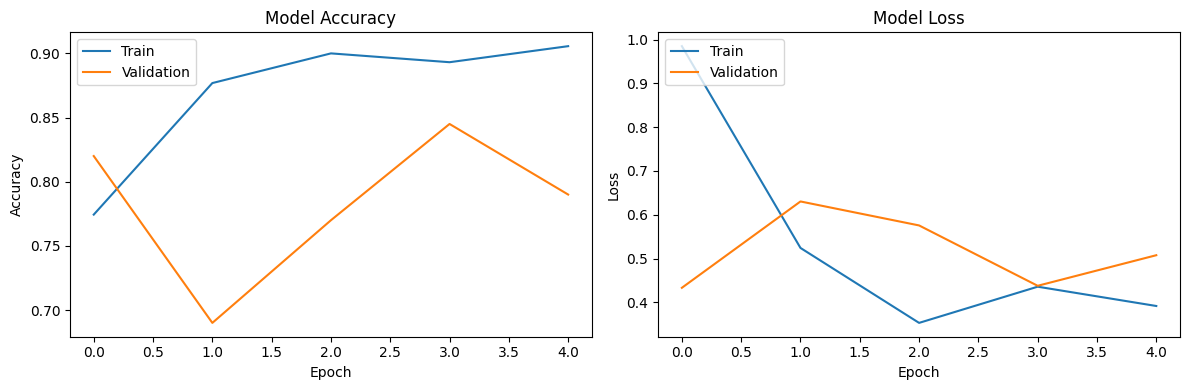

In [ ]:
model = build_model(num_classes=2)

epochs = 5
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_val)
plot_hist(hist)

In [ ]:
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted Labels:", predicted_labels)

4/4 [==============================] - 99s 2s/step
Predicted Labels: [1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1]


In [ ]:
import os

test_directory = '/content/drive/MyDrive/image_vision/1k_real_fake/test/'
class_names = os.listdir(test_directory)
print("Class Names:", class_names)

true_labels = []
for images, labels in test:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

print("True Labels:", true_labels)

Class Names: ['0', '1']
True Labels: [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy}")

Accuracy: 0.455
